### Importing Packages

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### Importing Data

In [199]:
df = pd.read_csv("data/cities_by_day.csv")       
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Exploring Data

In [200]:
print(f'The data contains {df.shape[0]} rows and {df.shape[1]} columns')

The data contains 29531 rows and 16 columns


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


We have 3 object and 13 float variables.<br>
* Here the noticable thing is Date is of datetime and AQI_Bucket is of category type

### Changing Columns to Appropriate Type

In [180]:
df['Date'] = pd.to_datetime(df['Date'])
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

In [181]:
print(f'The available data is between {df.Date.min()} to {df.Date.max()}')

The available data is between 2015-01-01 00:00:00 to 2020-07-01 00:00:00


In [182]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
C8H10                float64
AQI                  float64
AQI_Bucket          category
dtype: object

### Summarizing Data

In [183]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [184]:
num_cols = df.select_dtypes(include='float64').columns
pollutants = num_cols[:-1]

### Adding Year Column

In [185]:
df['Year'] = df['Date'].dt.year
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


### Data Visualization

#### Multivariate Analysis

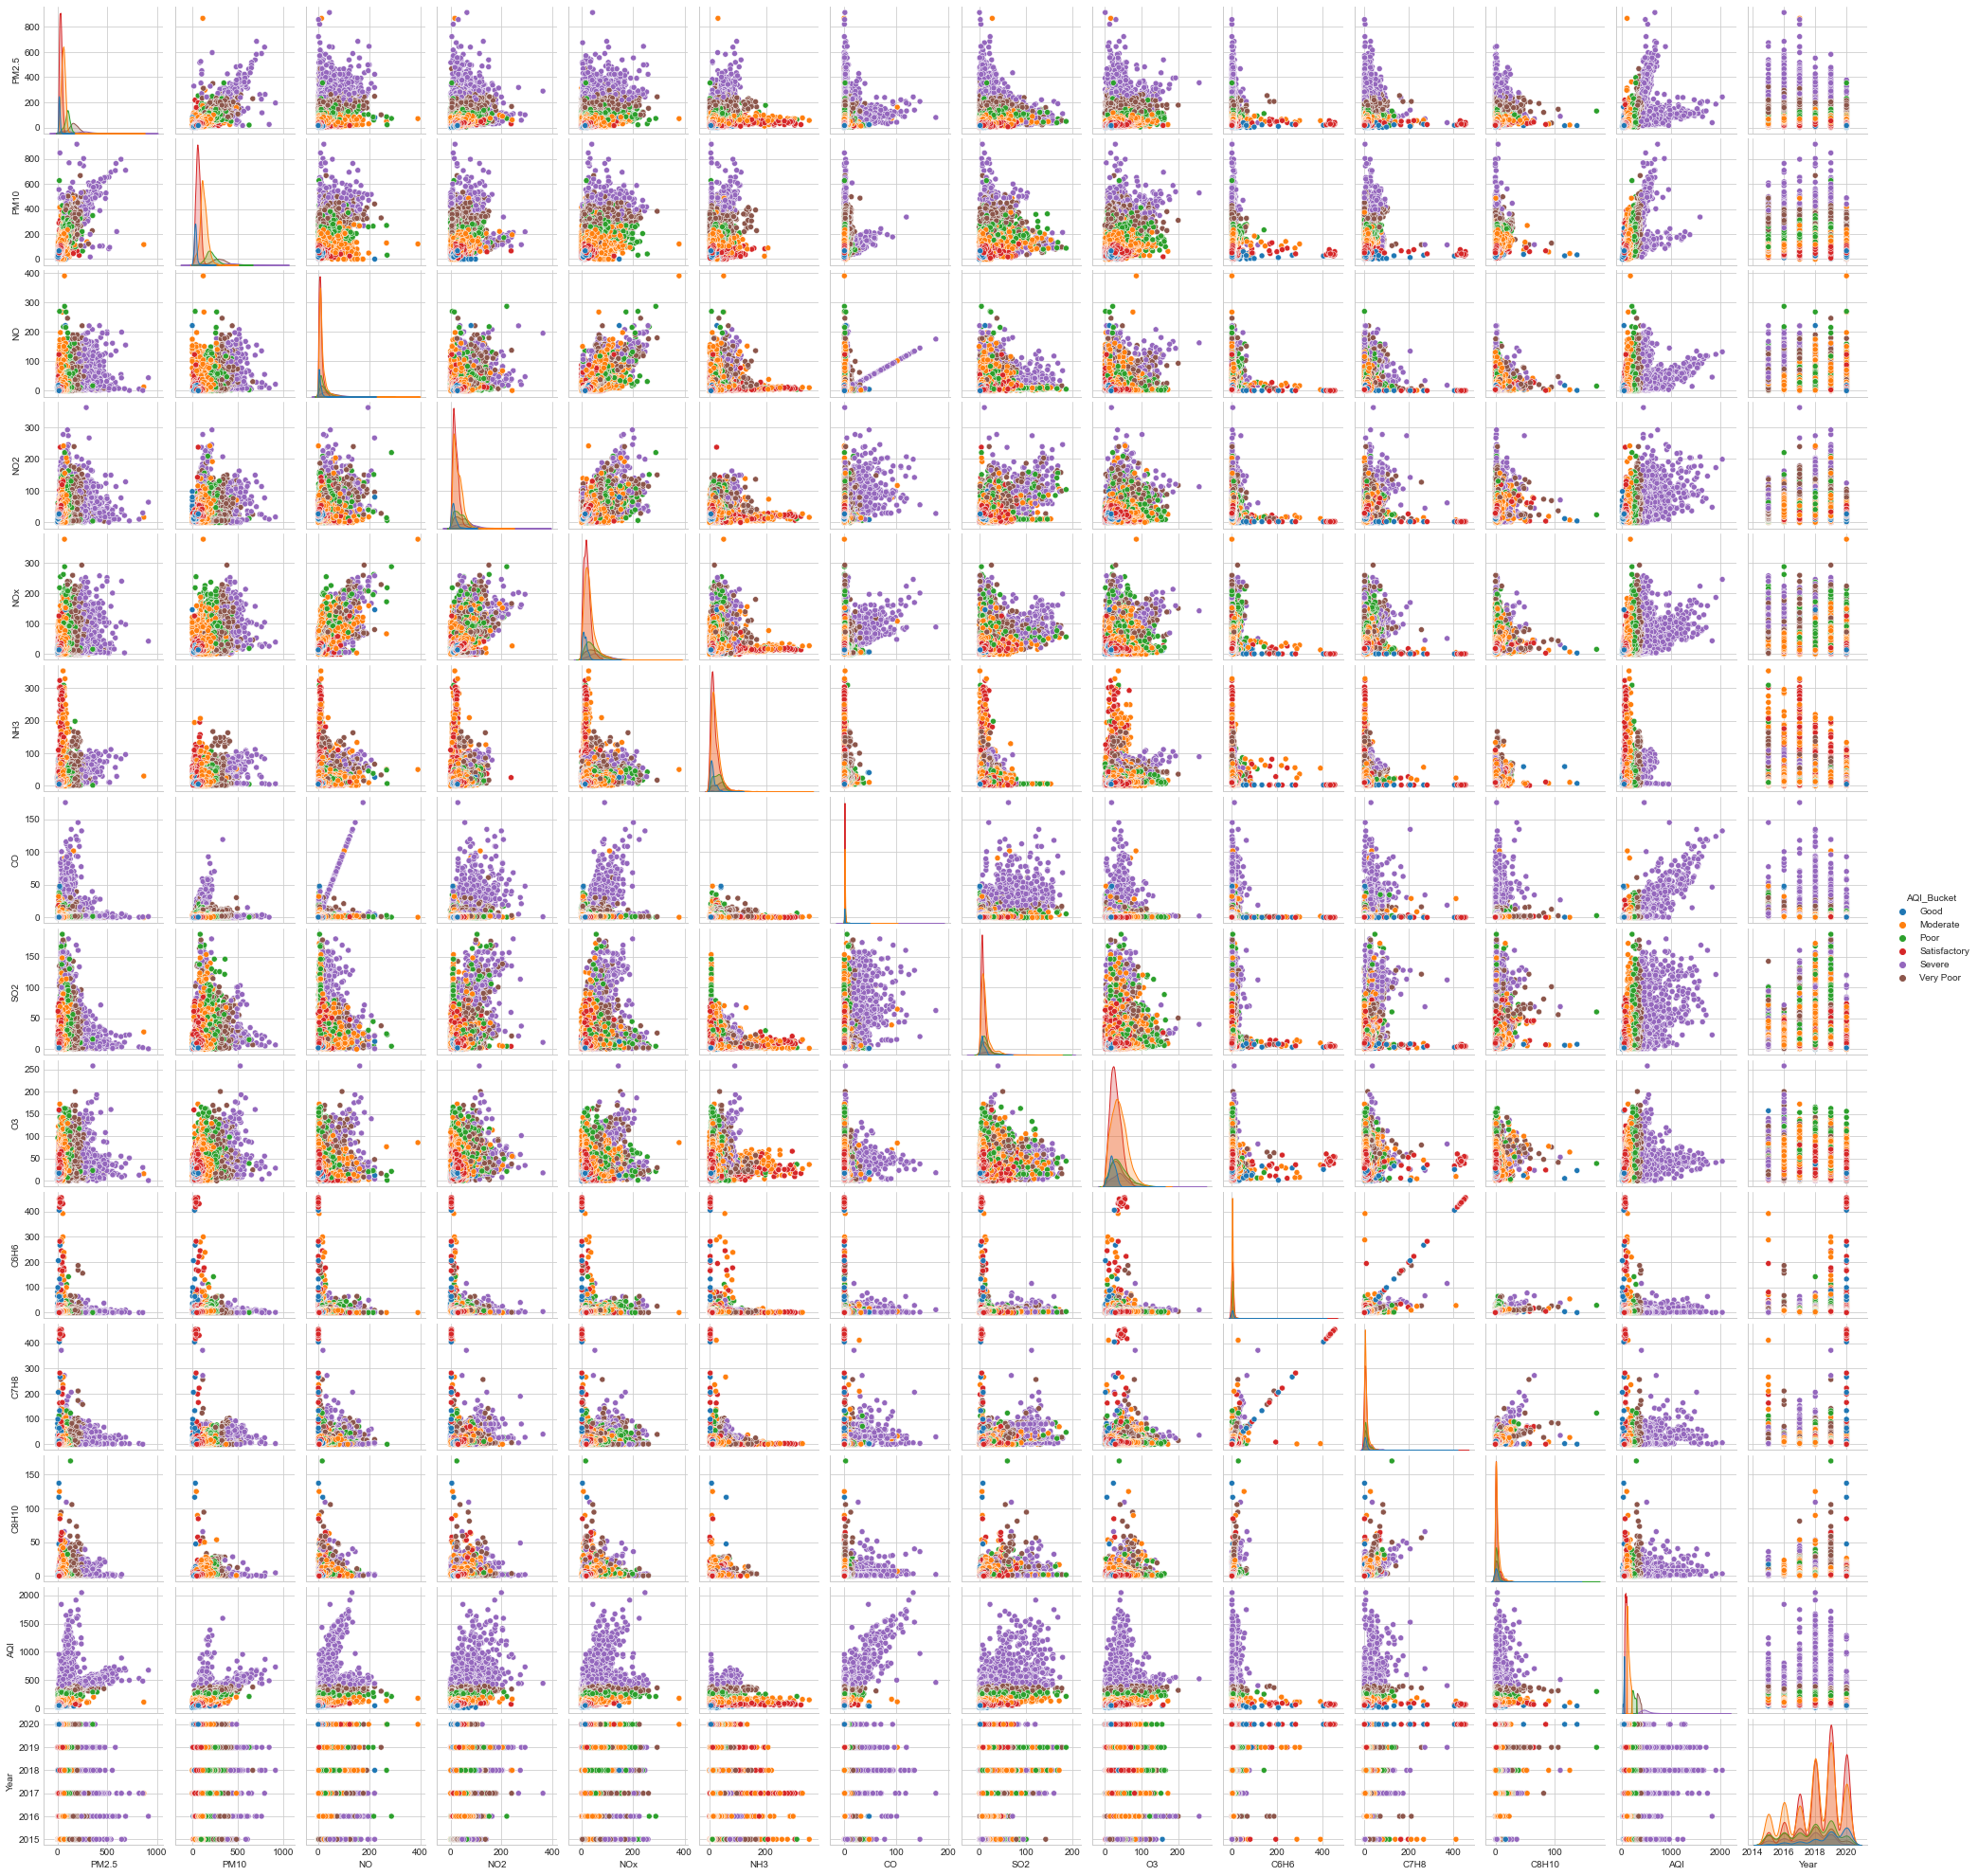

In [150]:
sns.pairplot(df,hue='AQI_Bucket',height=2)
plt.show()

#### Analysis on Pollutants

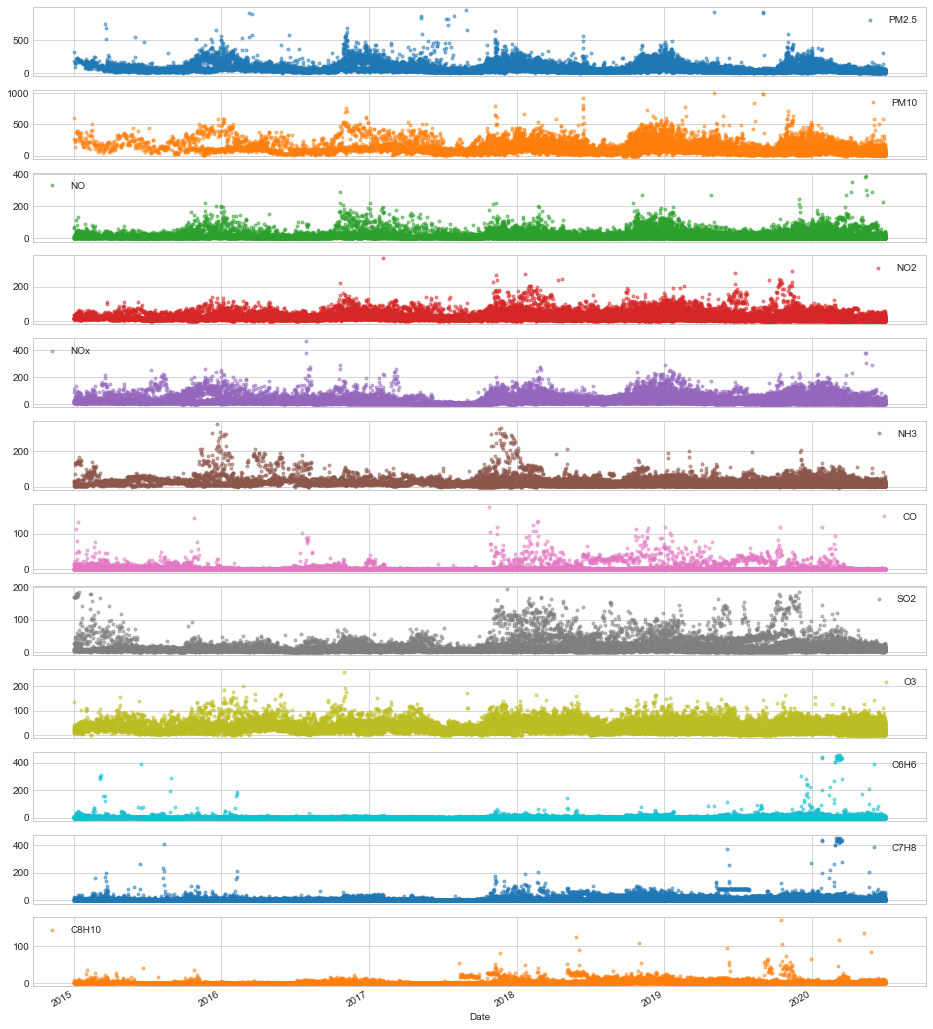

In [151]:
ax = df.set_index('Date')[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)

#### Variation in values of Pollutants over years

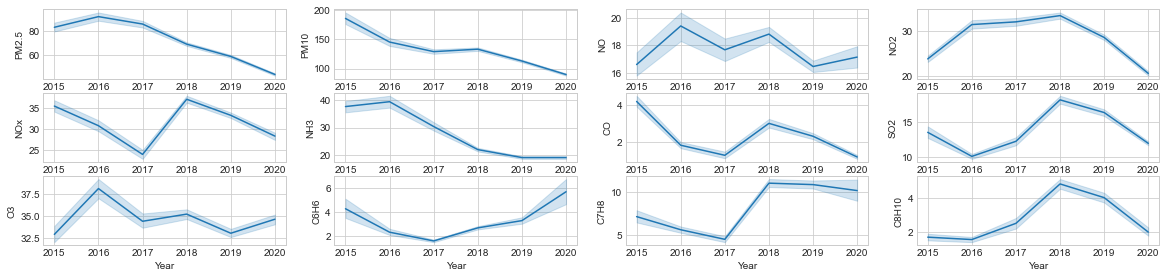

In [152]:
x= df.iloc[ : , 2:]
fig = plt.figure(figsize=(20,12))
for i , col in enumerate(pollutants):
    fig.add_subplot(8, 4, i+1)
    sns.lineplot(x='Year',y=col , data=x)

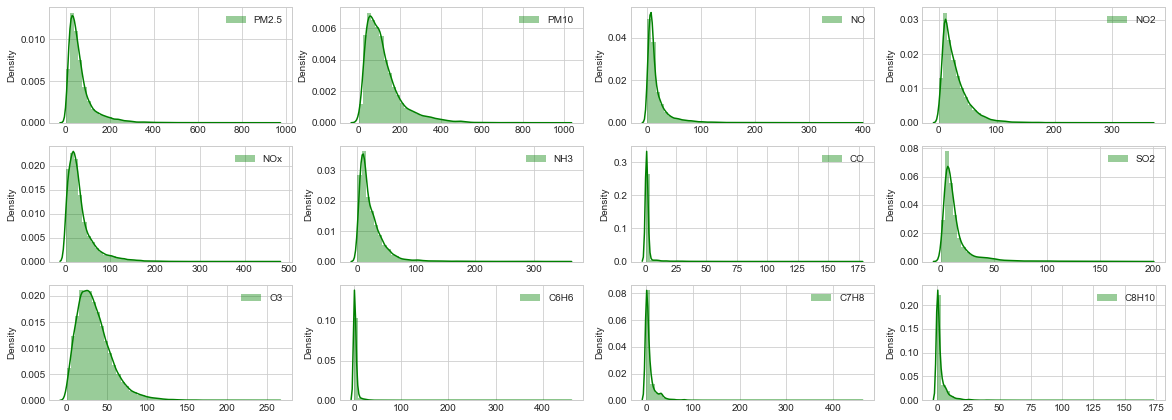

In [153]:
fig = plt.figure(figsize=(20,20))
for i , col in enumerate(pollutants):
    fig.add_subplot(8, 4, i+1)
    sns.distplot(x=df[col], color='green', label=col)
    plt.legend()
plt.show()

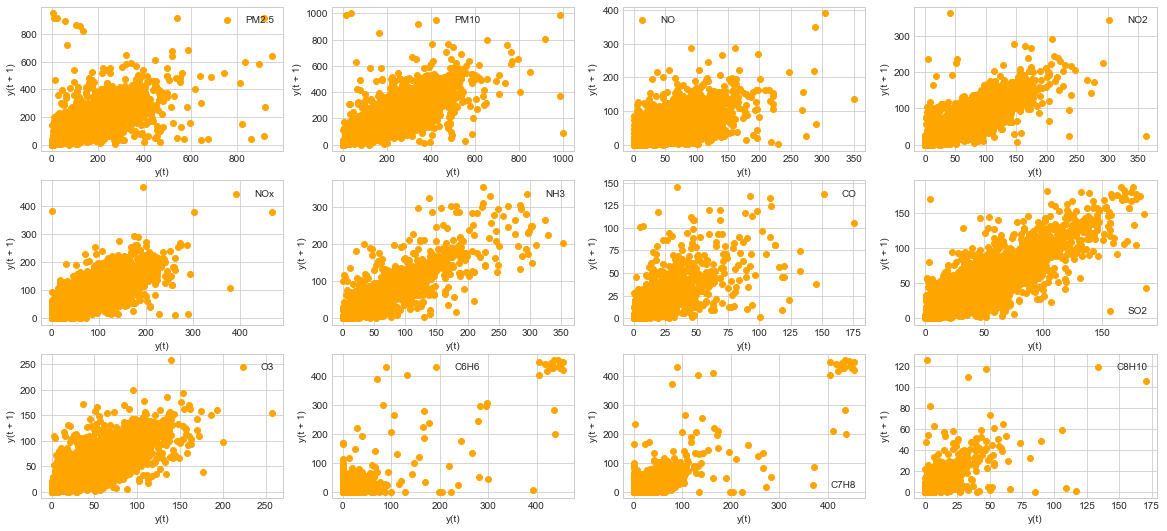

In [154]:
from pandas.plotting import lag_plot
fig = plt.figure(figsize=(20,25))
for i , col in enumerate(pollutants):
    fig.add_subplot(8, 4, i+1)
    lag_plot(df[col], c='orange', label=col)
    plt.legend()
plt.show()

#### Analyzing Cities Data

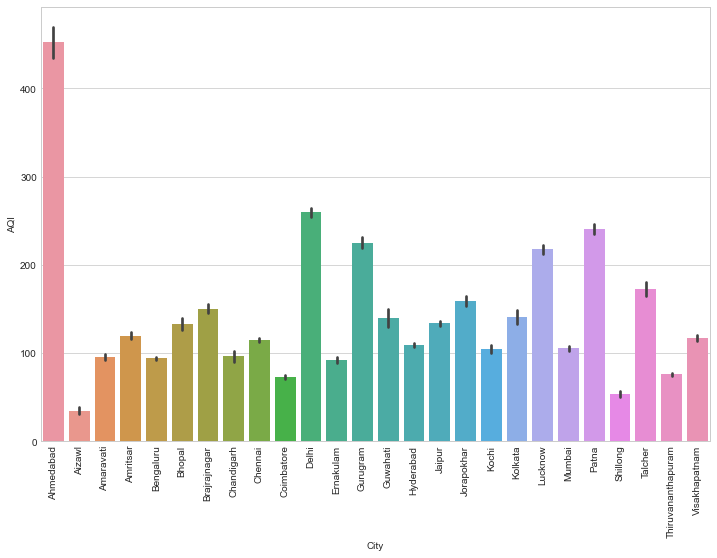

In [155]:
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='AQI', data=df)
plt.xticks(rotation=90)
plt.show()

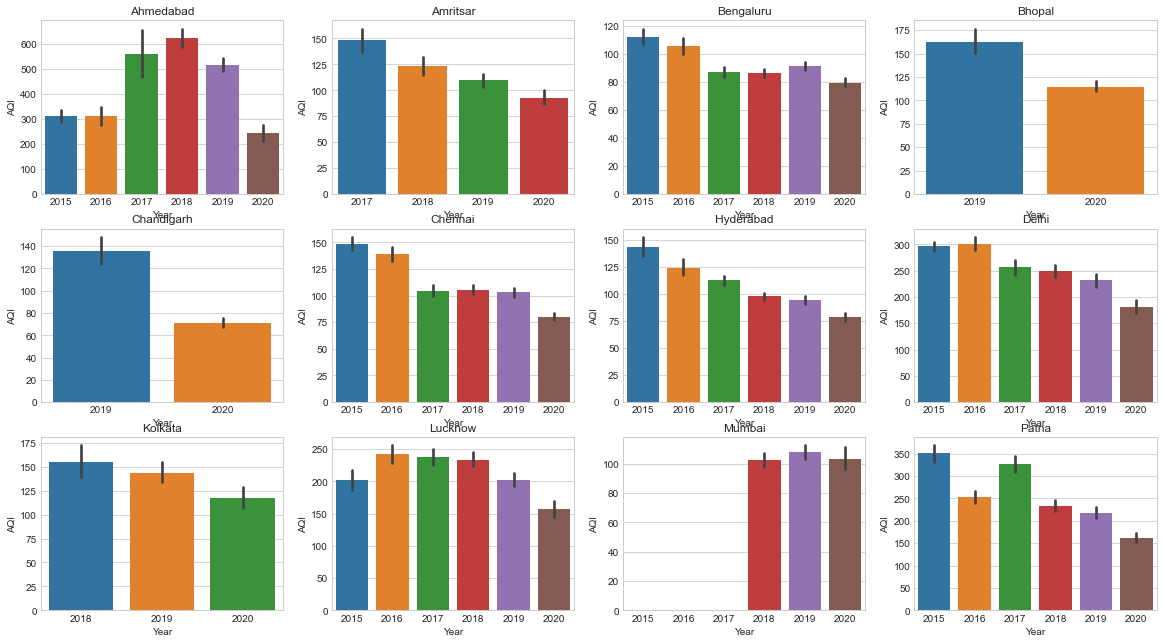

In [156]:
#plotting the average AQI ove years which have AQI greater than 500
df['City'][df['AQI']>= 500].value_counts()
cols = ['Ahmedabad','Amritsar', 'Bengaluru','Bhopal','Chandigarh', 'Chennai','Hyderabad','Delhi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna']
fig = plt.figure(figsize=(20,30))
for i,col in enumerate(cols):
    fig.add_subplot(8, 4, i+1)
    x=df[df['City']== col]
    sns.barplot(x='Year', y = 'AQI', data=x)
    plt.title(col)

#### Top 10 Most Polluted Cities

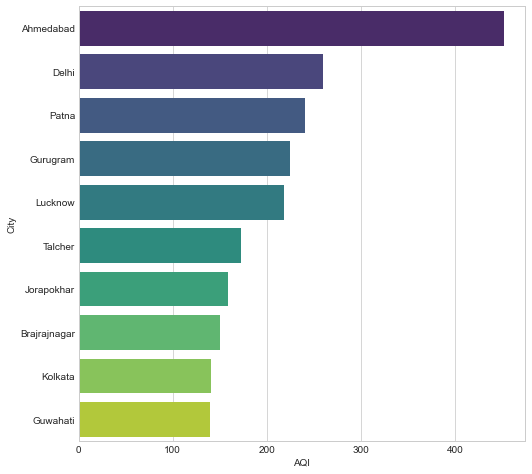

In [157]:
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending = False).head(10))
x=x.reset_index('City')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(data= x , x='AQI', y= 'City',orient = 'h' , palette = 'viridis')
plt.show()

#### Counting AQI_Bucket Values

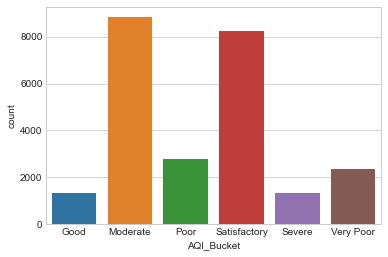

In [158]:
sns.countplot(x='AQI_Bucket', data=df)
plt.show()

#### AQI_Bucket yearly analysis

In [159]:
year_aqi_bucket=df.groupby(["Year","AQI_Bucket"])["AQI_Bucket"].count()
year_aqi_bucket= pd.DataFrame(year_aqi_bucket)
year_aqi_bucket.columns = ["AQI_Bucket Count"]
year_aqi_bucket.reset_index(inplace=True)
year_aqi_bucket

,Year,AQI_Bucket,AQI_Bucket Count
0,2015,Good,27
1,2015,Moderate,756
2,2015,Poor,326
3,2015,Satisfactory,278
4,2015,Severe,145
5,2015,Very Poor,295
6,2016,Good,80
7,2016,Moderate,1040
8,2016,Poor,388
9,2016,Satisfactory,494


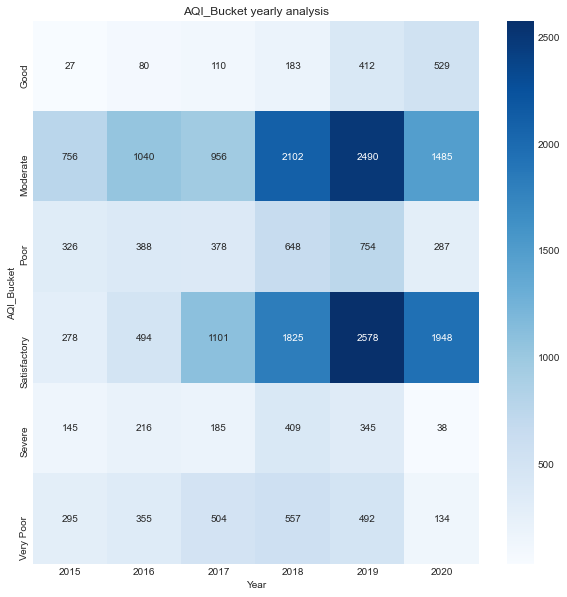

In [160]:
year_aqi_bucket_pivot = year_aqi_bucket.pivot_table(index="AQI_Bucket",columns="Year",values="AQI_Bucket Count")
year_aqi_bucket_pivot.fillna(0,inplace=True)
plt.figure(figsize=(10,10))
plt.title("AQI_Bucket yearly analysis")
sns.heatmap(year_aqi_bucket_pivot
            ,cmap="Blues",annot=True,fmt="g")
plt.show()

### Correlation in Data

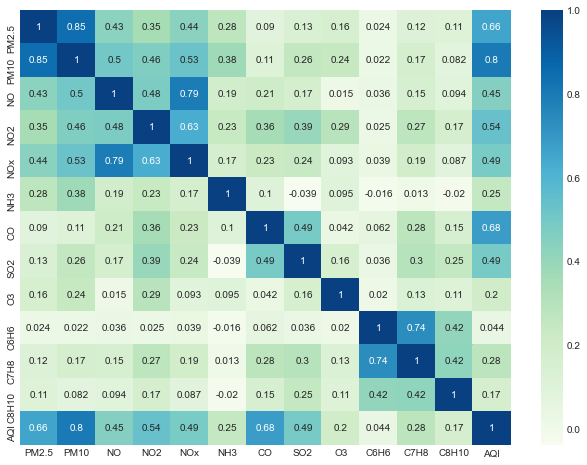

In [161]:
plt.figure(figsize=(11,8))
sns.heatmap(df.drop('Year', axis=1).corr(), annot=True, cmap='GnBu')
plt.show()

### Calculating Missing Values

In [201]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

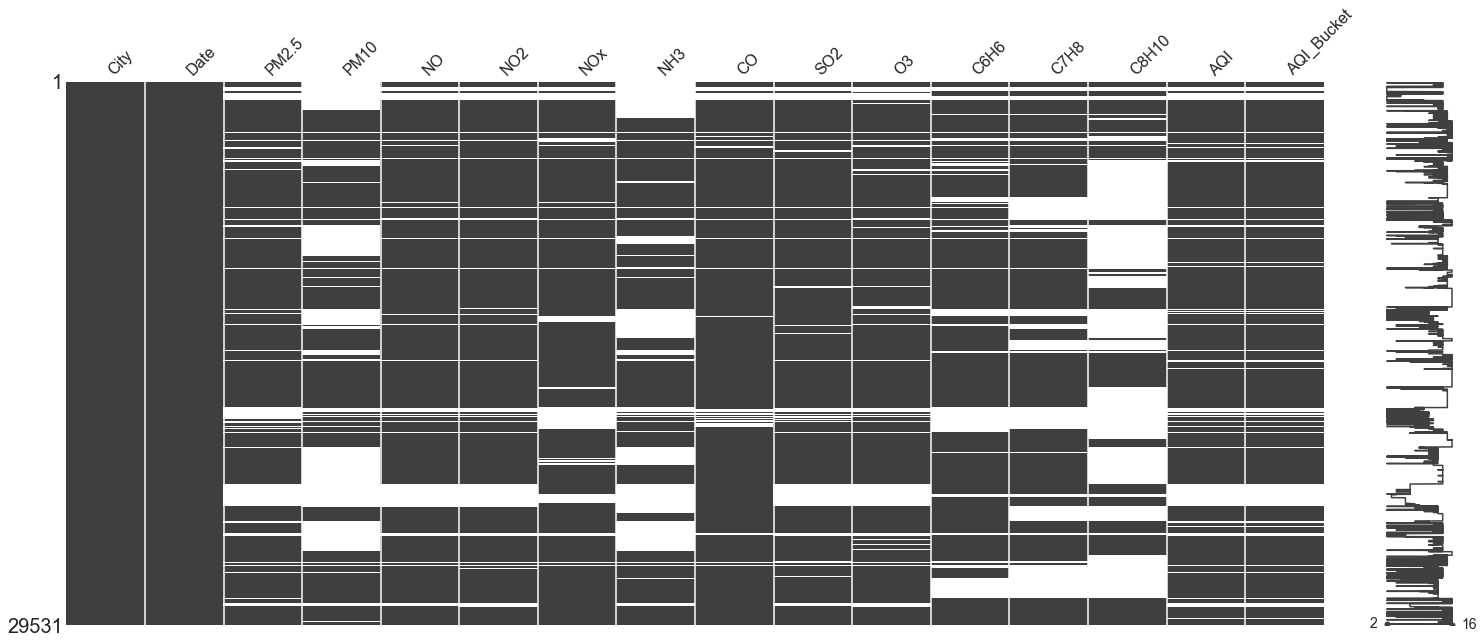

In [202]:
import missingno as msno
msno.matrix(df)
plt.show()

In [203]:
def missing_val_table(df):
    mis_val = df.isnull().sum()
    mis_val_perc = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_perc], axis=1)
    mis_val_table = mis_val_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'})
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending = False).round(1)
    return mis_val_table

missing_values = missing_val_table(df)
missing_values.style.background_gradient(cmap='Reds')

,Missing Values,% of Total Values
C8H10,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
C7H8,8041,27.200000
C6H6,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


Column __C8H10__ has maximum number of missing values

### Handling Missing Values

In [204]:
def fill_na(column):
    df[column].fillna(df[column].mean(), inplace=True)
    
for column in  pollutants:
    fill_na(column)

In [205]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI           4681
AQI_Bucket    4681
dtype: int64

### Checking Outliers

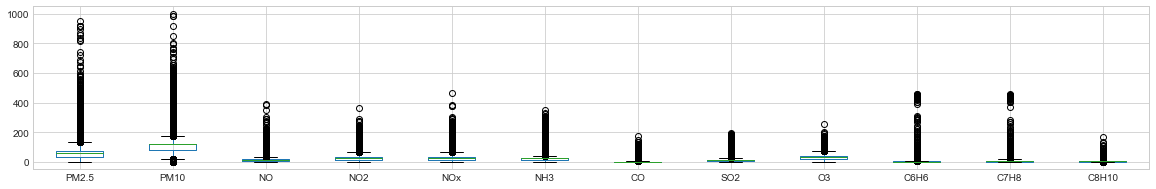

In [206]:
df[pollutants].boxplot(figsize=(20,3))
plt.show()

### Handling Outliers

In [207]:
def remove_outliers(column):
    q1, q3 = np.percentile(df[column], [25,75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df[column] = df[column].apply(lambda x:lower if x<lower else upper if x>upper else x)
    
for column in  pollutants:
    remove_outliers(column)

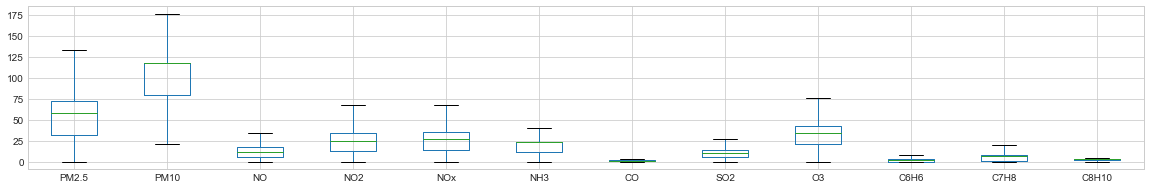

In [208]:
df[pollutants].boxplot(figsize=(20,3))
plt.show()

### Normalizing the Data

In [209]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit_transform(df[pollutants])
df1 = pd.DataFrame(mms, columns=pollutants)

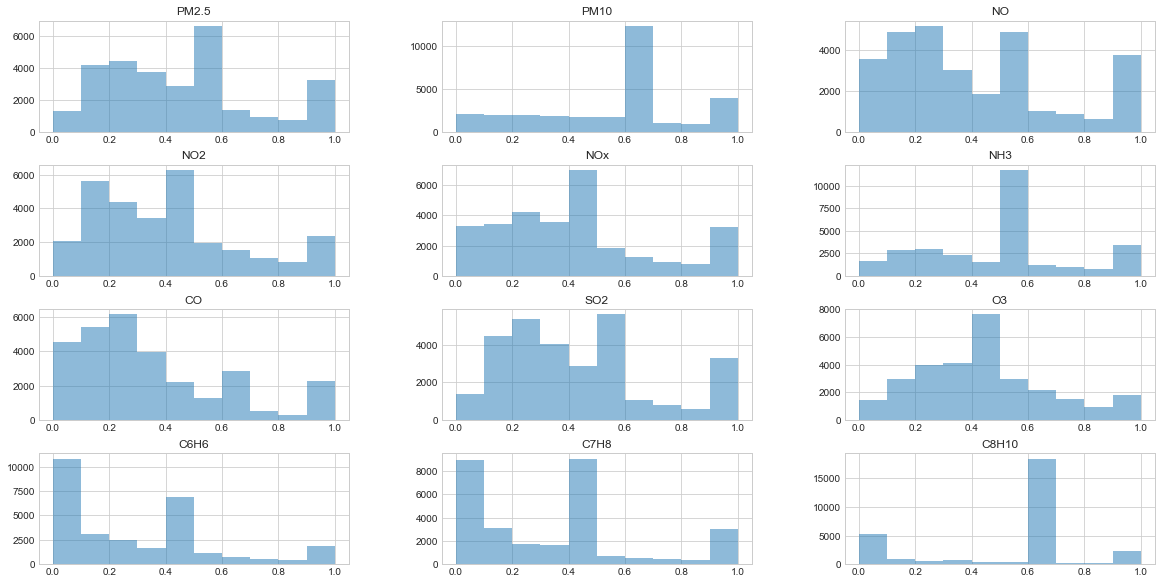

In [210]:
df1.hist(alpha=0.5, figsize=(20, 10))
plt.show()

### Preparing Data for Model

In [211]:
df1['AQI'] = df['AQI']
df1.dropna(subset=['AQI'], inplace=True)

In [ ]:
X=df1[pollutants]
y=df1['AQI']

### Splitting Data into Training and Testing Data 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Building Gradient Bossting Model

In [220]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()
model.fit(X_train,y_train)

0.8544741374677177

### Evaluating model

In [240]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8651415136290211

In [221]:
r2_train = model.score(X_train, y_train)
r2_train

0.8640437055351878

In [222]:
r2_test = model.score(X_test, y_test)
r2_test

0.8544741374677177

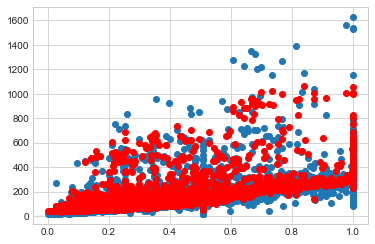

In [223]:
plt.scatter(X_test.iloc[:,0], y_test)
plt.scatter(X_test.iloc[:,0], y_pred, c='r')
plt.show()

In [226]:
model.fit(X,y)
df['AQI'] = model.predict(df[pollutants])

In [227]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI              0
AQI_Bucket    4681
dtype: int64

### Classification on AQI_Bucket

In [263]:
df2 = df.dropna(subset=['AQI_Bucket'])

In [264]:
X=df2[pollutants]
y=df2['AQI_Bucket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [274]:
df_pred = pd.DataFrame(y_pred)
df_pred.columns = ["Pred_AQI"]

In [266]:
pred_AQI_Bucket = []
for aqi in df_pred["Pred_AQI"]:
    if aqi>=0 and aqi<=50:
        pred_AQI_Bucket.append("Good")
    elif aqi>=51 and aqi<=100:
        pred_AQI_Bucket.append("Satisfactory")
    elif aqi>=101 and aqi<=200:
        pred_AQI_Bucket.append("Moderate")
    elif aqi>201 and aqi<=300:
        pred_AQI_Bucket.append("Poor")
    elif aqi>301 and aqi<=400:
        pred_AQI_Bucket.append("Very Poor")
    else:
        pred_AQI_Bucket.append("Severe")

In [267]:
df_pred["Pred_AQI_Bucket"] = pd.DataFrame(pred_AQI_Bucket)

In [270]:
x=df_pred["Pred_AQI_Bucket"]
y=y_test

In [271]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
x = le.transform(x)

In [272]:
print(accuracy_score(y,x))

0.732335425720264
